In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from nltk.tokenize import word_tokenize
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import gensim
from gensim.models import Word2Vec 
from nltk.tokenize import word_tokenize 
from xgboost import XGBClassifier
from sklearn.svm import SVC

from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

C:\Users\Sarah\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Sarah\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Train set

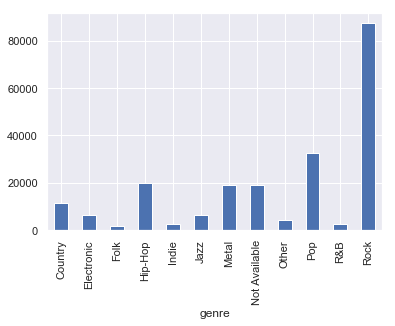

In [2]:
df_train = pd.read_csv('train.csv')
df_train.dropna(axis=0, inplace=True)

df_train = df_train.drop(['year'], axis=1)
df_train = df_train.drop(['artist'], axis=1)
df_train.groupby("genre")['index'].count().plot.bar()
df_train = df_train.drop(['index'], axis=1)

In [3]:
df_train = df_train[df_train.genre != "Not Available"]
df_train = df_train[df_train.genre != "R&B"]
df_train = df_train[df_train.genre != "Folk"]
df_train = df_train[df_train.genre != "Indie"]
df_train = df_train[df_train.genre != "Electronic"]
df_train = df_train[df_train.genre != "Metal"]
df_train = df_train[df_train.genre != "Other"]
df_train = df_train[df_train.genre != "Rock"]

# Test set

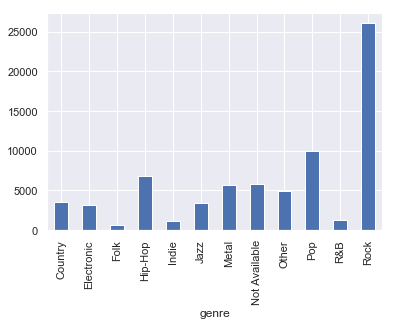

In [4]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['year'], axis=1)
df_test = df_test.drop(['artist'], axis=1)
df_test.groupby("genre")['index'].count().plot.bar()
df_test.drop(['index'], axis=1, inplace=True)

In [ ]:
df_test = df_test[df_test.genre != "Not Available"]
df_test = df_test[df_test.genre != "R&B"]
df_test = df_test[df_test.genre != "Folk"]
df_test = df_test[df_test.genre != "Indie"]
df_test = df_test[df_test.genre != "Electronic"]
df_test = df_test[df_test.genre != "Metal"]
df_test = df_test[df_test.genre != "Other"]
df_test = df_test[df_test.genre != "Rock"]

# Pre-processing

In [5]:
def clean(text, stem_words=True):
    from nltk.tokenize import word_tokenize
    
    if type(text) != str or text=='':
        return ''
    
    text = re.sub("i-ll", "I will", text)
    text = re.sub("-", " ", text)
    # Clean the text
    text = text.lower()
    text = re.sub("\'s", " ", text) 
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("\'re", "are", text)
    text = re.sub("can't", "cannot ", text) 
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am ", text)
    text = re.sub("\\n"," ", text)    
    #remove everything except words and space(no punctuation)
    text = re.sub(r'[^\w\s]','',text)

    
    #remove numbers
    text = re.sub('\d+','', text)
    
    text = re.sub("[!~#$+%*:()'?-]", ' ', text)
    
    # Return a list of words
    return text

In [6]:
df_train['lyrics'] = df_train['lyrics'].apply(clean)
df_train['song'] = df_train['song'].apply(clean)

In [7]:
df_test['lyrics'] = df_test['lyrics'].apply(clean)
df_test['song'] = df_test['song'].apply(clean)

In [8]:
labels = df_train['genre'].values
y = labels
lyrics = df_train['lyrics'].values

labels = df_test['genre'].values
y_test = labels
X_test = df_test['lyrics'].values

***

# TFIDF Train-set

In [9]:
vectorizer = TfidfVectorizer()
vectorizer.fit(lyrics)
X = vectorizer.transform(lyrics)

#print(X)

# BOW Train-set

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(lyrics)
X = vectorizer.transform(lyrics)

#print(X)

# TFIDF Test-set

In [10]:
Xt = vectorizer.transform(X_test)

# BOW Test-set

In [ ]:
Xt = vectorizer.transform(X_test)

# Decision tree

In [ ]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X,y)
DT_p = DT.predict(Xt)
print(DT.score(Xt,y_test))

In [ ]:
cf = confusion_matrix(y_test,DT_p)
    
show_confusion_matrix(cf)

# Multinomial NB

In [ ]:
MNB = MultinomialNB()
MNB.fit(X,y)
MNB_p = MNB.predict(Xt)
print(MNB.score(Xt,y_test))

In [ ]:
cf = confusion_matrix(y_test,MNB_p)
    
show_confusion_matrix(cf)

# Random Forest Classifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X,y)
rf_p=RF.predict(Xt)
print(RF.score(Xt,y_test))

In [ ]:
cf = confusion_matrix(y_test,rf_p)    
show_confusion_matrix(cf)

# Gradient Boosting

In [ ]:
GD = GradientBoostingClassifier()
GD.fit(X,y)
GD_p = GD.predict(Xt)
print(GD.score(Xt, y_test))

In [ ]:
cf = confusion_matrix(y_test,GD_p)    
show_confusion_matrix(cf)

# Confusion Matrix

In [ ]:
def show_confusion_matrix(cm):
    df_cm = pd.DataFrame(cm, index = ['Country','Hip-hop','Jazz','Pop'],
                      columns = ['Country','Hip-hop','Jazz','Pop'])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

# Word2Vec

In [ ]:
token_train = []
for token in lyrics:
    token_train.append(word_tokenize(token))

token_test = []
for token in X_test:
    token_test.append(word_tokenize(token))

train = token_train+token_test

In [ ]:
def sent2vec(s, model): 
    M = []
    words = word_tokenize(str(s).lower())
    for word in words:
        if word in model:
            M.append(model[word])
    M = np.array(M)
    if len(M) > 0:
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())
    else:
        return np.zeros(100)

In [ ]:
model = Word2Vec(train)
model.init_sims(replace=True) #to normalize
w2v = np.array([sent2vec(l, model) for l in lyrics]) 
w2v_t = np.array([sent2vec(l, model) for l in X_test])

## XG Boost

In [ ]:
xgb = XGBClassifier()
w2vX = xgb.fit(w2v, y)
xgb_p = xgb.predict(w2v_t)
print(xgb.score(w2v_t,y_test))

In [ ]:
cf = confusion_matrix(y_test,xgb_p)    
show_confusion_matrix(cf)

## Linear Support Vector Machine

In [ ]:
LSVC = SVC(kernel = 'linear')
LSVC.fit(w2v,y)
LSVC_p = LSVC.predict(w2v_t)
print(LSVC.score(w2v_t,y_test))

In [ ]:
LSVC_p = LSVC.predict(w2v_t)
cf = confusion_matrix(y_test,LSVC_p)    
show_confusion_matrix(cf)

# Word Clouds

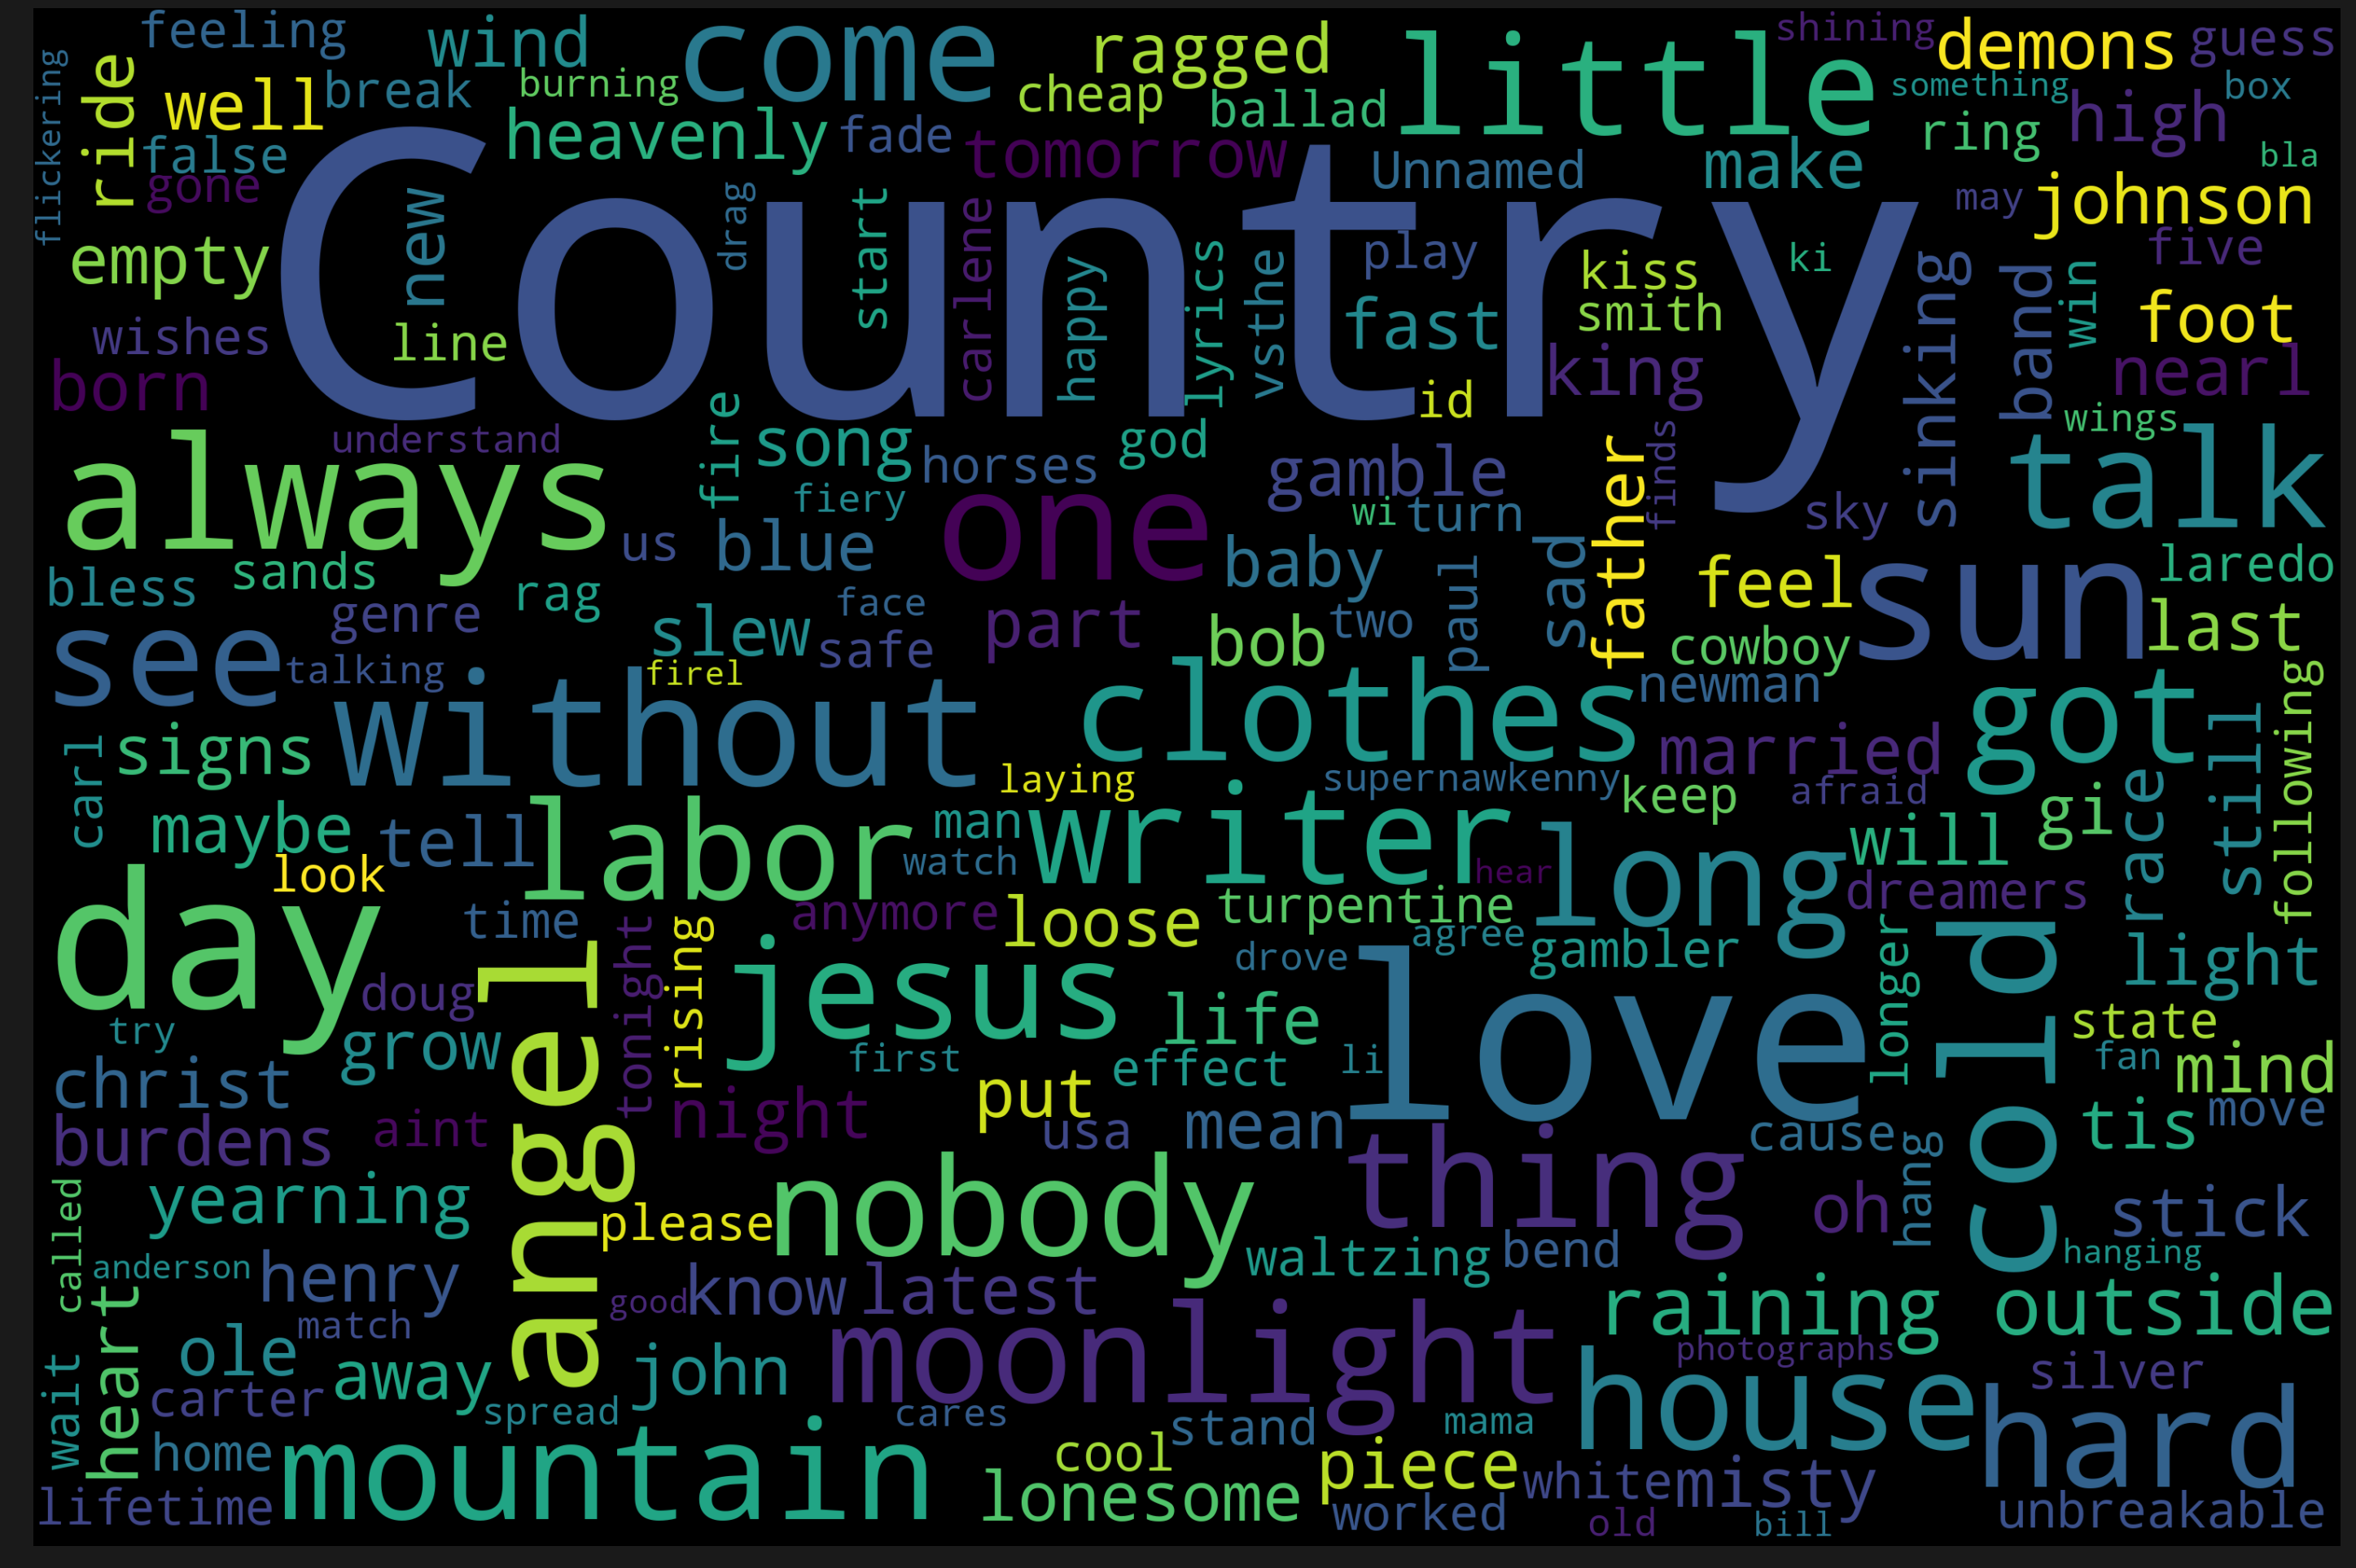

In [12]:
text = df_train[df_train.genre == 'Country']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

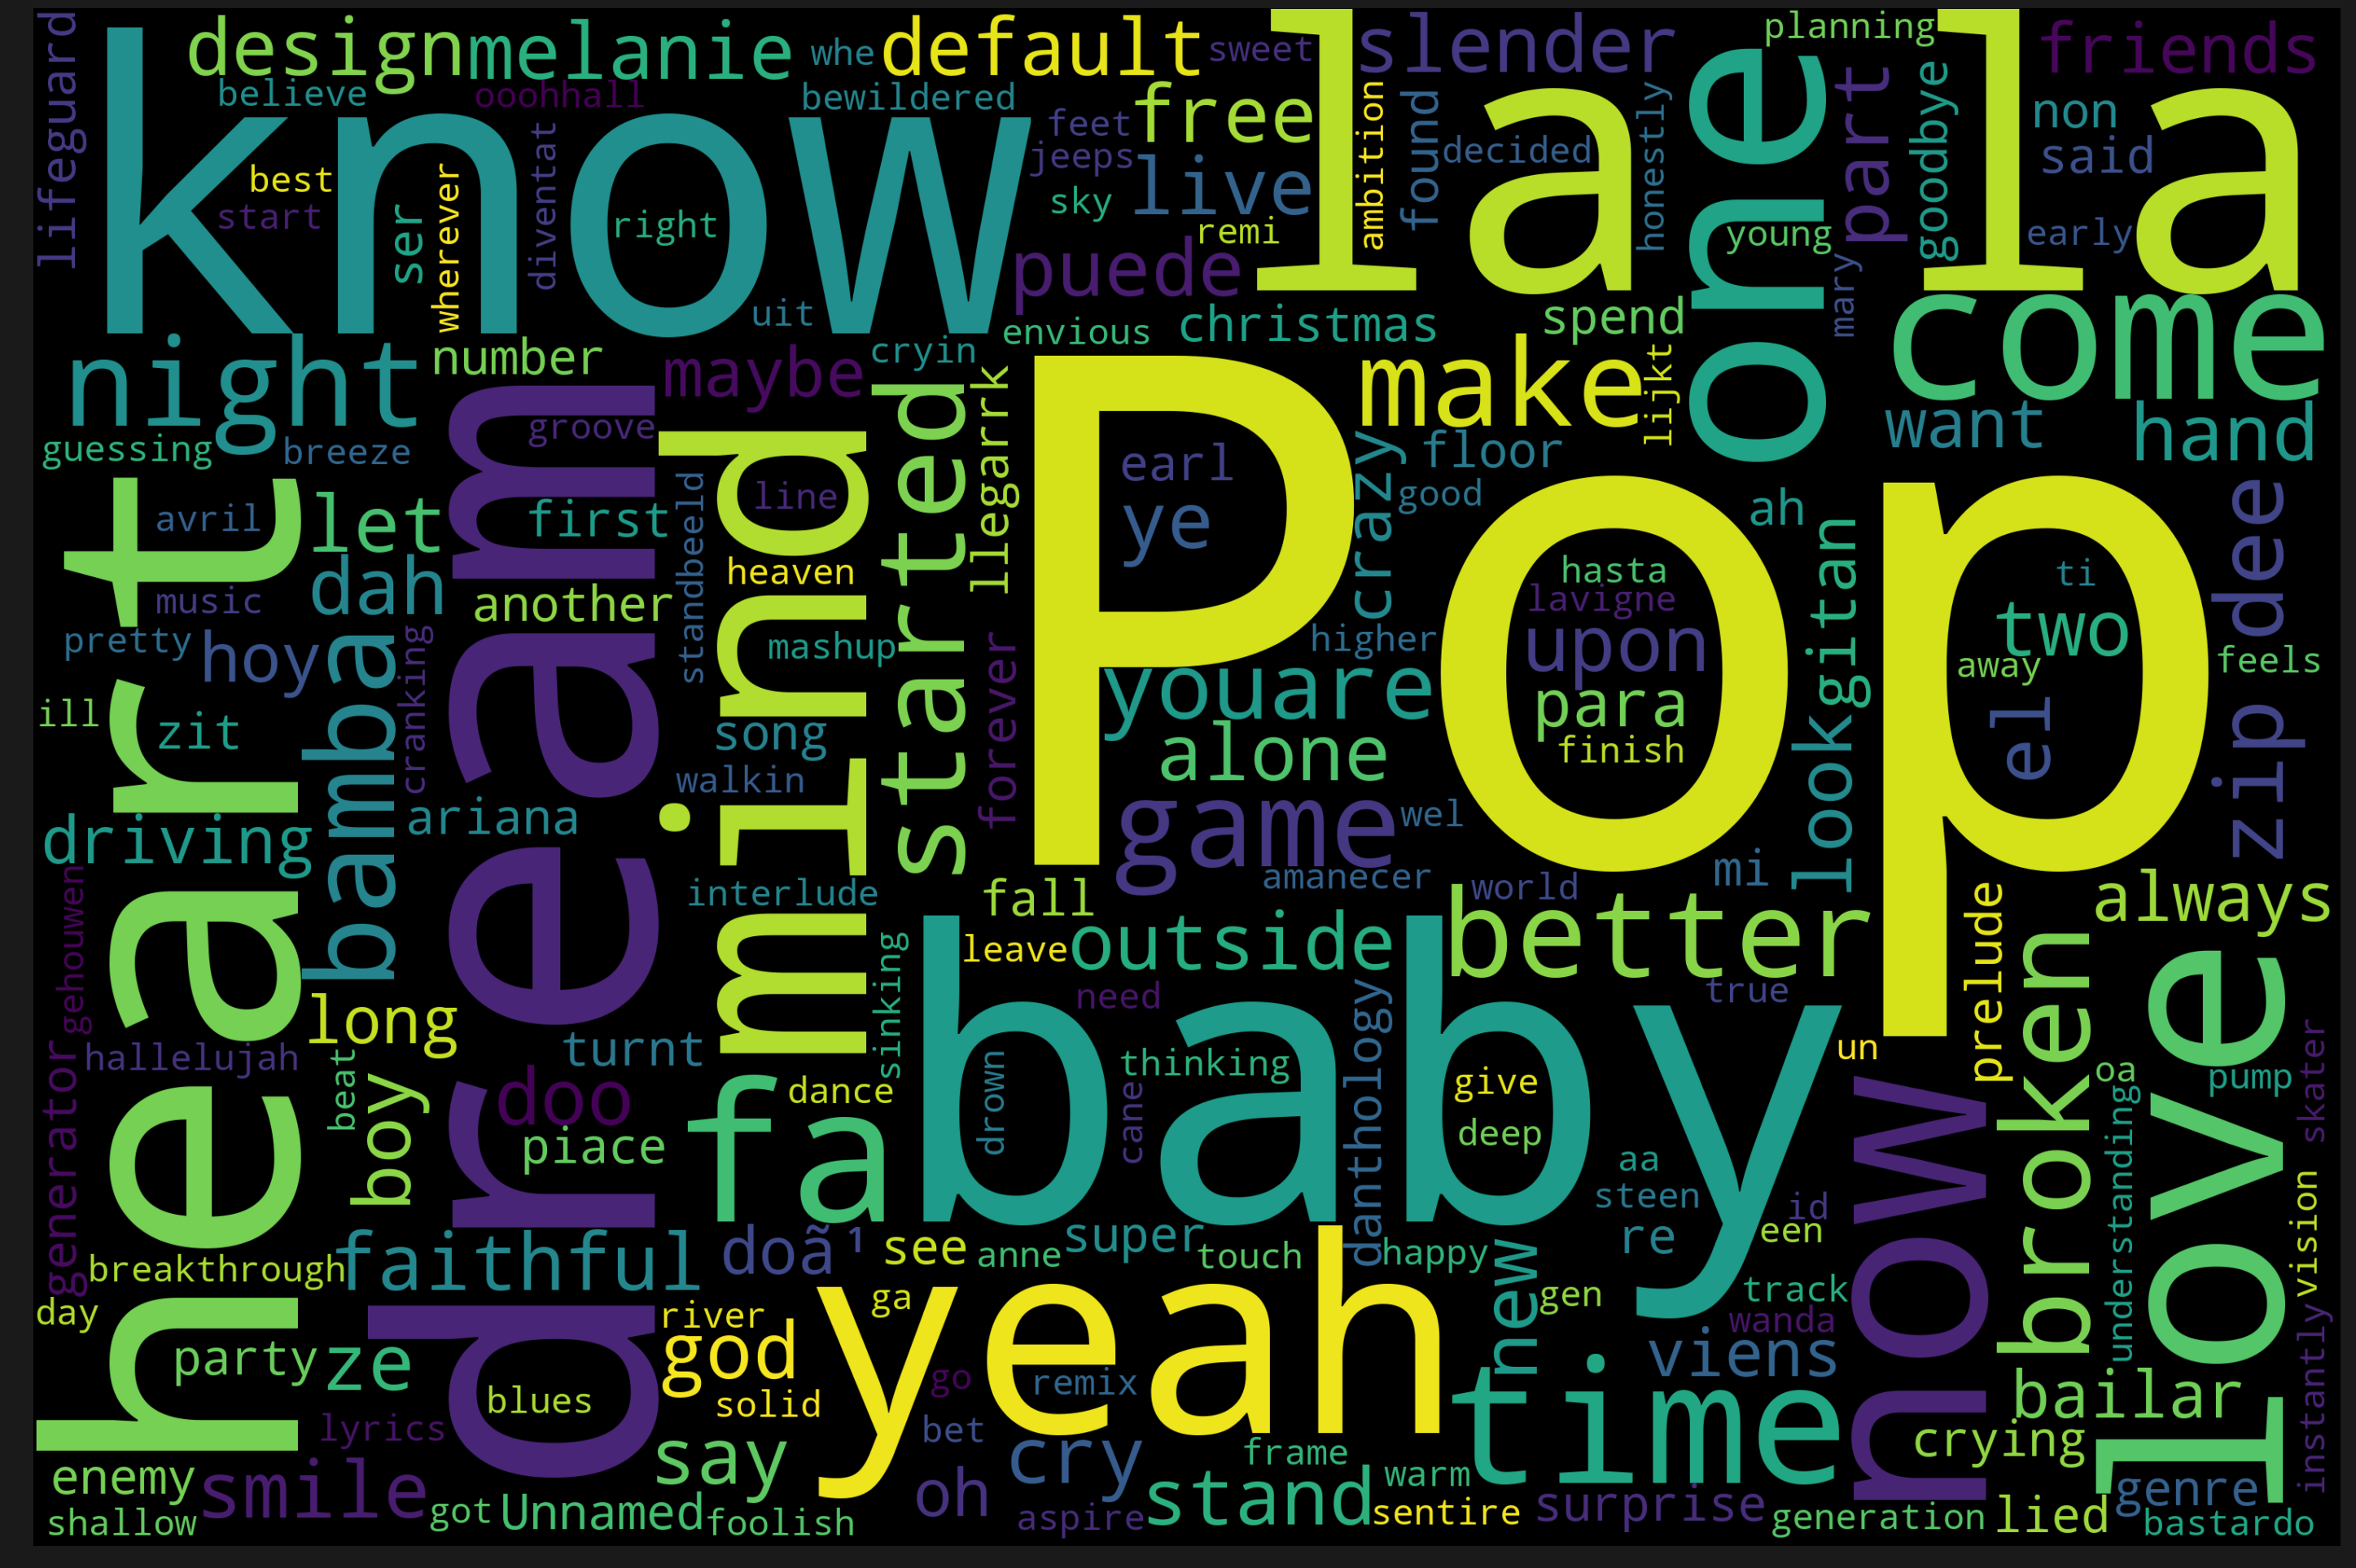

In [13]:
text = df_train[df_train.genre == 'Pop']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

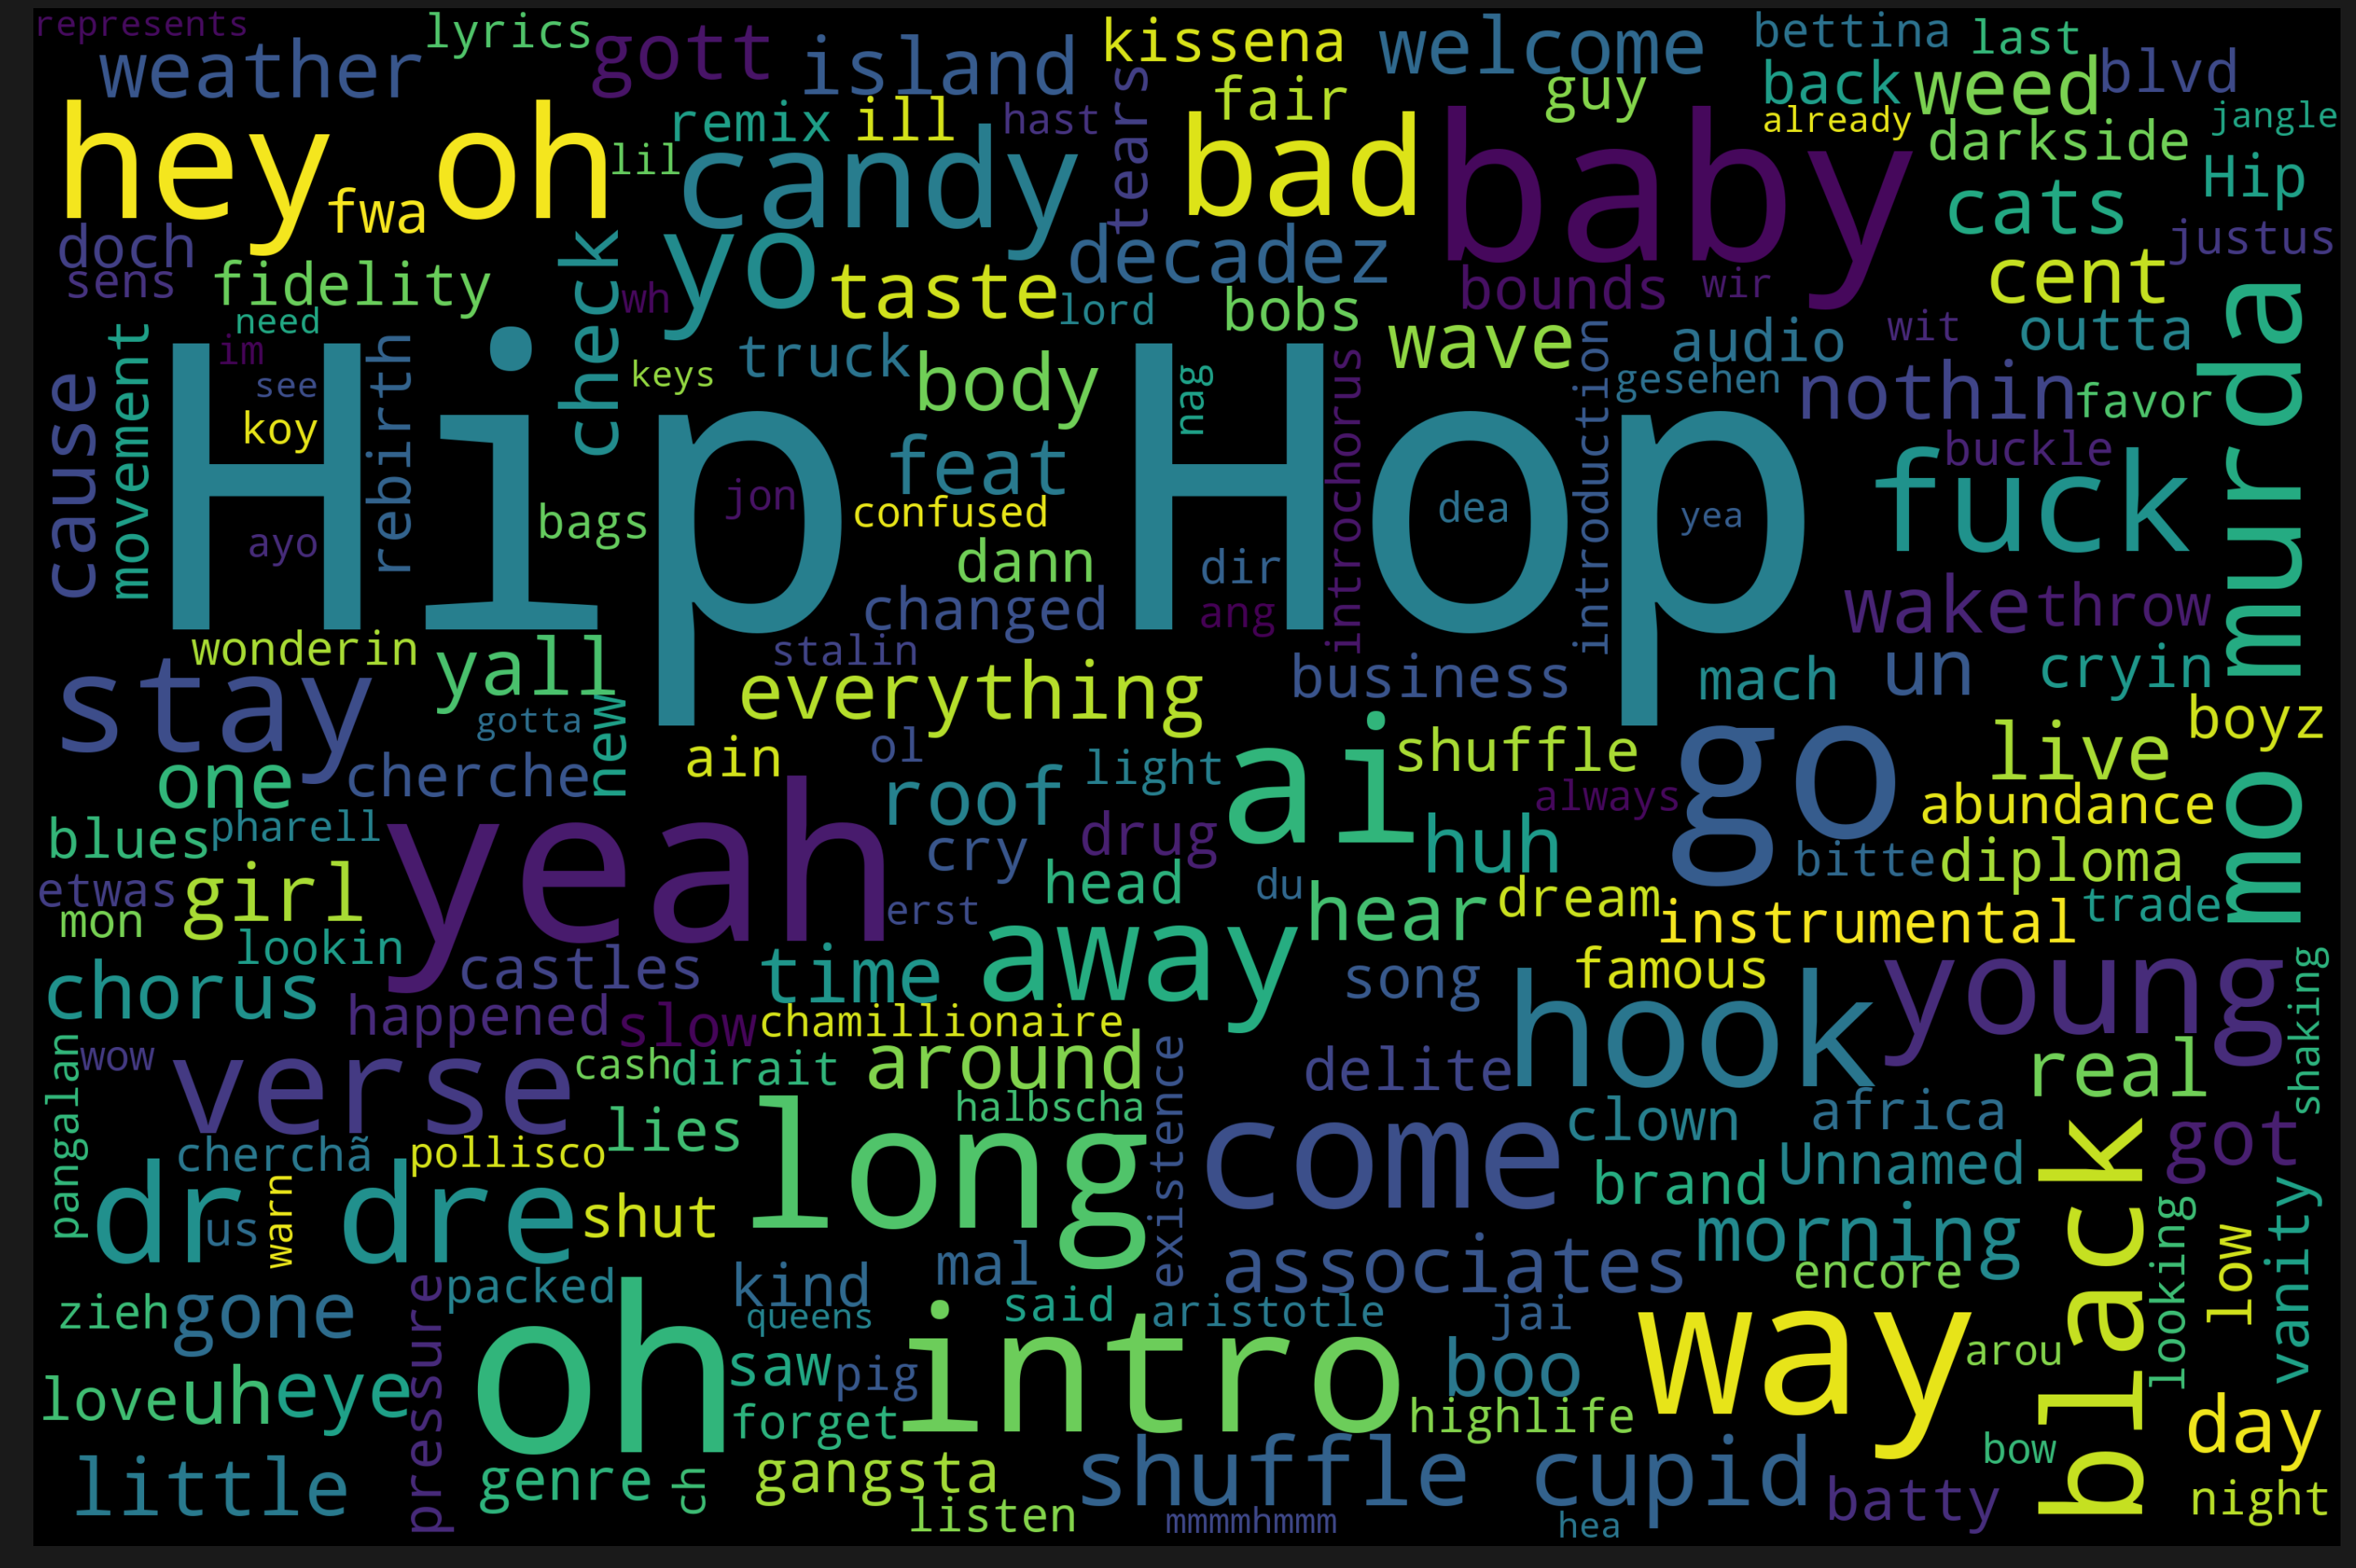

In [14]:
text = df_train[df_train.genre == 'Hip-Hop']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

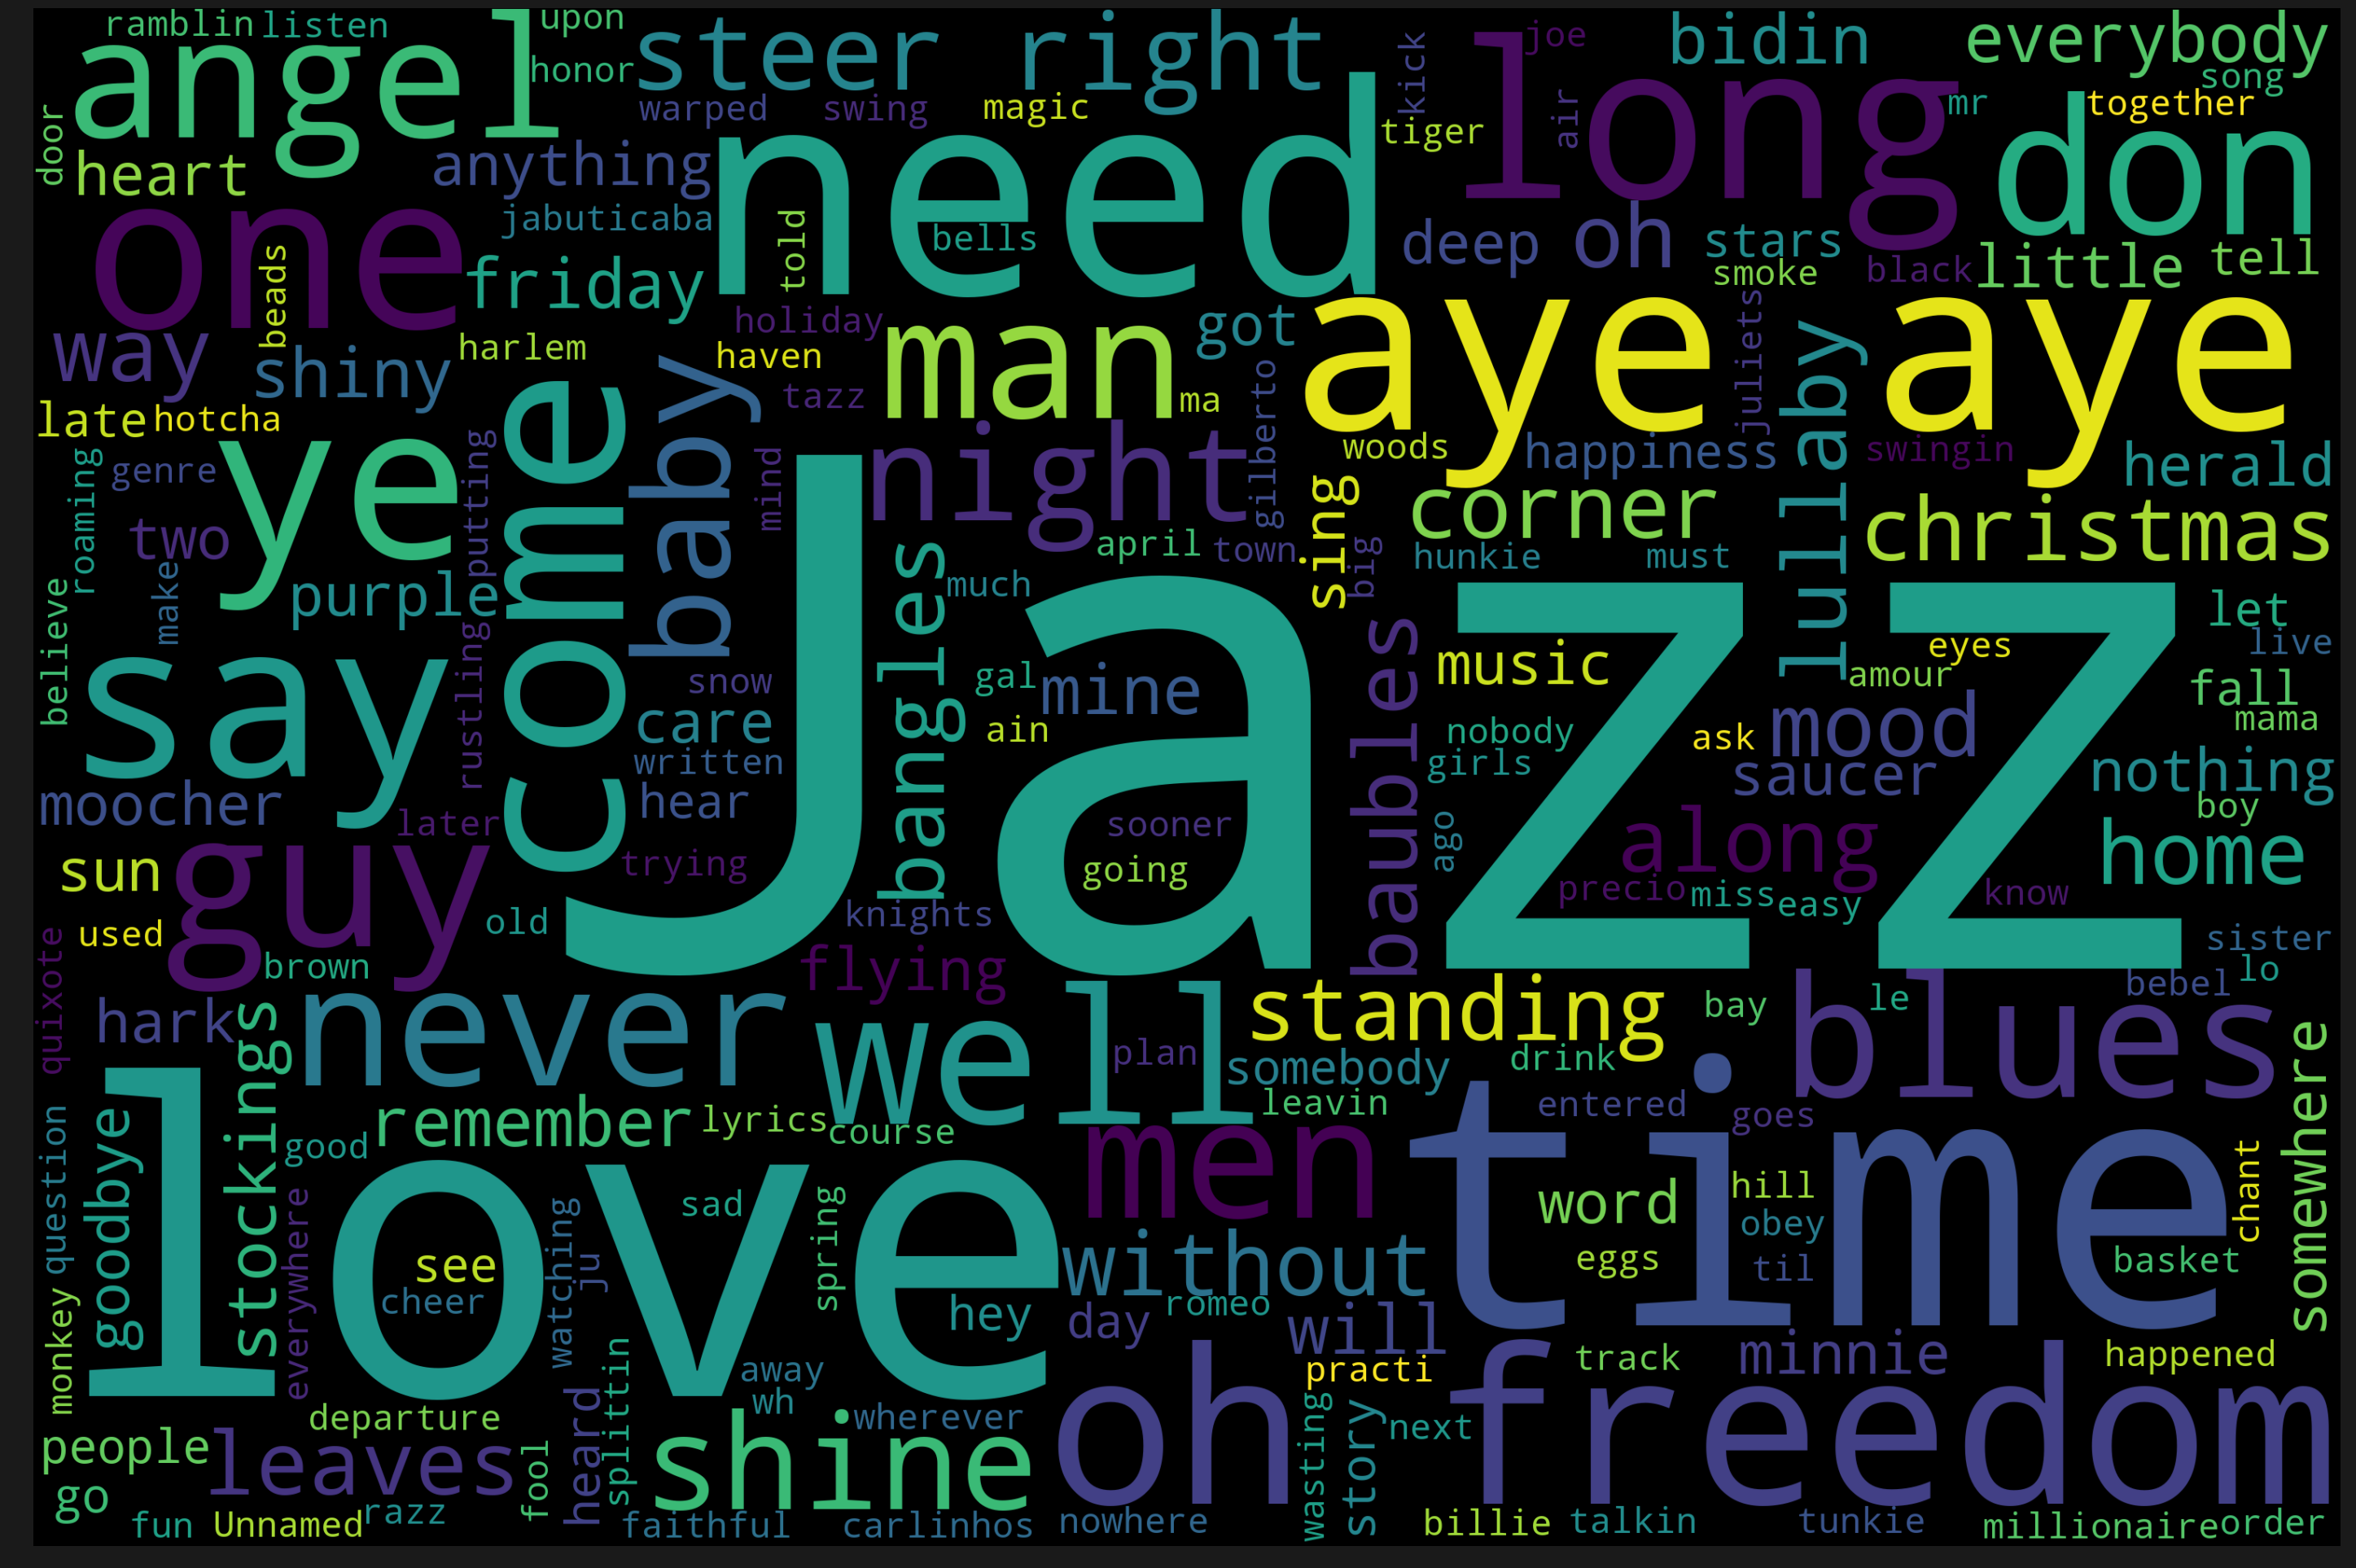

In [11]:
text = df_train[df_train.genre == 'Jazz']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()